* REGRESION LINEAL PARA EL LAB 2

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

DATOS = pd.read_csv("/workspaces/First-repository/LAB 2/Lab 2_ Excel - Resistencia 1.csv")
DATOS = DATOS.drop (columns = "Unnamed: 2")

#datos = np.loadtxt("/workspaces/First-repository/LAB 2/Lab 2_ Excel - Resistencia 1.csv",delimiter = ',',skiprows=1)
   # Obtener los datos desde la grabaciones, formato ".csv" (por comas) "xslx" (excel) 
DATOS

,Tiempo s Carga,Voltaje V Carga,Tiempo s Descarga,Voltaje V Descarga
0,0.10,1.97,0.01,1.47
1,0.50,1.95,1.05,1.45
2,1.00,1.93,2.18,1.40
3,2.00,1.88,4.18,1.35
4,3.14,1.83,6.03,1.30
5,4.26,1.77,8.03,1.25
6,6.10,1.71,9.21,1.20
7,7.18,1.65,11.15,1.15
8,9.06,1.60,13.14,1.10
9,10.24,1.54,15.25,1.05


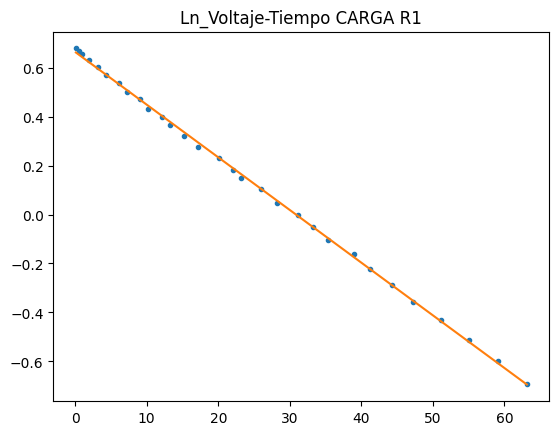

In [44]:
datos = DATOS[["Tiempo s Carga","Voltaje V Carga"]].to_numpy()
datos_lin = np.log(datos[:,1])
regresion = stats.linregress(datos[:,0],datos_lin)
plt.plot(datos[:,0],datos_lin,ls="", marker = ".")
plt.plot(datos[:,0],regresion.slope*datos[:,0]+regresion.intercept)
plt.title("Ln_Voltaje-Tiempo CARGA R1")
plt.show()


In [51]:
X = sm.add_constant(DATOS["Tiempo s Carga"])

model = sm.OLS(DATOS["Voltaje V Carga"], X).fit()
print(model.summary())

r_squared = model.rsquared
print(f'R²: {r_squared}')


                            OLS Regression Results                            
Dep. Variable:        Voltaje V Carga   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     719.3
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.63e-21
Time:                        15:36:15   Log-Likelihood:                 30.193
No. Observations:                  30   AIC:                            -56.39
Df Residuals:                      28   BIC:                            -53.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8228      0.027     67.

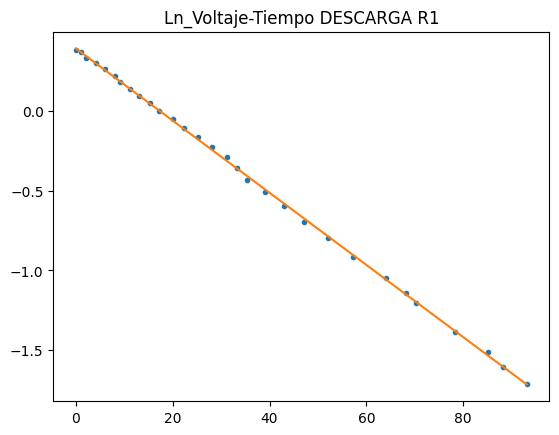

In [41]:
datos = DATOS[["Tiempo s Descarga","Voltaje V Descarga"]].to_numpy()
datos_lin = np.log(datos[:,1])
regresion = stats.linregress(datos[:,0],datos_lin)
plt.plot(datos[:,0],datos_lin,ls="", marker = ".")
plt.plot(datos[:,0],regresion.slope*datos[:,0]+regresion.intercept)
plt.title("Ln_Voltaje-Tiempo DESCARGA R1")
plt.show()


In [52]:
X = sm.add_constant(DATOS["Tiempo s Descarga"])

model = sm.OLS(DATOS["Voltaje V Descarga"], X).fit()
print(model.summary())

r_squared = model.rsquared
print(f'R²: {r_squared}')

                            OLS Regression Results                            
Dep. Variable:     Voltaje V Descarga   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     384.2
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           6.87e-18
Time:                        15:38:05   Log-Likelihood:                 24.446
No. Observations:                  30   AIC:                            -44.89
Df Residuals:                      28   BIC:                            -42.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2907      0.03